In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.1 MB/s eta 0:00:00


In [ ]:
# Create a folder to hold your dataset
!mkdir /content/dataset

# Unzip your file into that new folder
!unzip "/content/drive/My Drive/archive (1).zip" -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/data/val/images/PublicDataset00062.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00077.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00080.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00083.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00087.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00092.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00095.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00104.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00114.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00117.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00120.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00123.jpg  
  inflating: /content/dataset/data/val/images/PublicDataset00125.jpg  
  inflating: /content/data

In [ ]:
# List the files to confirm the path
!ls /content/dataset

data  data.yaml


In [ ]:
import yaml

# Define the new paths
new_paths = {
    'train': '/content/dataset/data/train/images',
    'val': '/content/dataset/data/val/images',
    'test': '/content/dataset/data/test/images'
}

# Load the YAML file
yaml_path = '/content/dataset/data.yaml'
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# Update the paths
data['train'] = new_paths['train']
data['val'] = new_paths['val']
data['test'] = new_paths['test']

# Save the corrected YAML file
with open(yaml_path, 'w') as file:
    yaml.dump(data, file)

print("data.yaml file has been corrected!")

data.yaml file has been corrected!


In [ ]:
!yolo train model=yolov8n.pt data=/content/dataset/data.yaml epochs=50 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fal

In [ ]:
!cp /content/runs/detect/train/weights/best.pt "/content/drive/My Drive/"

In [ ]:
from google.colab import files

# This is the path to your best model
file_path = '/content/runs/detect/train/weights/best.pt'

# This command will start the download in your browser
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import Image

# Display the main results graph
Image(filename='/content/runs/detect/train/results.png')

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/results.png'

In [ ]:
from IPython.display import Image

# Use the correct folder name you found (e.g., train2)
Image(filename='/content/runs/detect/train2/results.png')

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train2/results.png'

In [ ]:
!ls /content/runs/detect/

train


In [ ]:
!ls /content/runs/detect/train/

args.yaml   results.csv       train_batch1.jpg	weights
labels.jpg  train_batch0.jpg  train_batch2.jpg


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Load your results file ---
file_path = '/content/runs/detect/train/results.csv'
try:
    data = pd.read_csv(file_path)

    # --- 2. Clean up column names (they have weird spacing) ---
    data.columns = data.columns.str.strip()

    # --- 3. Plot mAP vs. Epochs ---
    plt.figure(figsize=(10, 5))
    plt.plot(data['epoch'], data['val/mAP_0.5'], label='Validation mAP@0.5')
    plt.title('Model mAP (Accuracy) vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('mAP@0.5')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- 4. Plot Loss vs. Epochs ---
    plt.figure(figsize=(10, 5))
    plt.plot(data['epoch'], data['train/box_loss'], label='Training Box Loss')
    plt.plot(data['epoch'], data['train/cls_loss'], label='Training Class Loss')
    plt.plot(data['epoch'], data['val/box_loss'], label='Validation Box Loss')
    plt.plot(data['epoch'], data['val/cls_loss'], label='Validation Class Loss')
    plt.title('Training and Validation Loss vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find the file at {file_path}")
except KeyError as e:
    print(f"Error: A required column is missing from the CSV. {e}")
    print("Available columns are:")
    print(data.columns)

Error: A required column is missing from the CSV. 'val/mAP_0.5'
Available columns are:
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


<Figure size 1000x500 with 0 Axes>

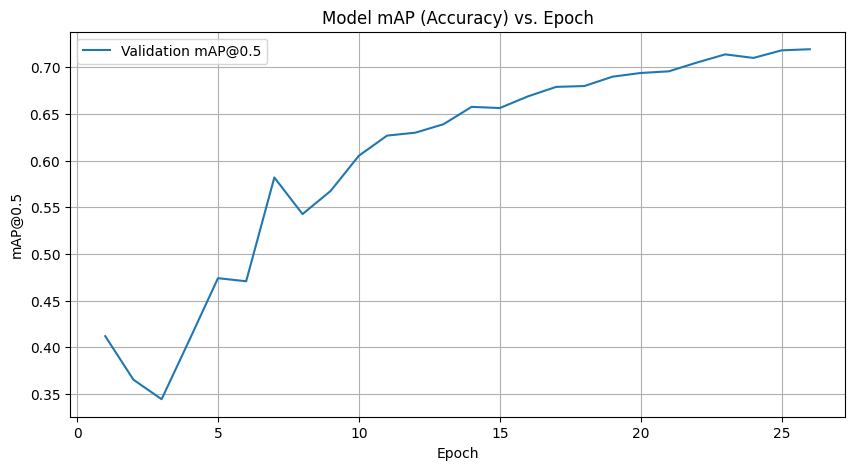

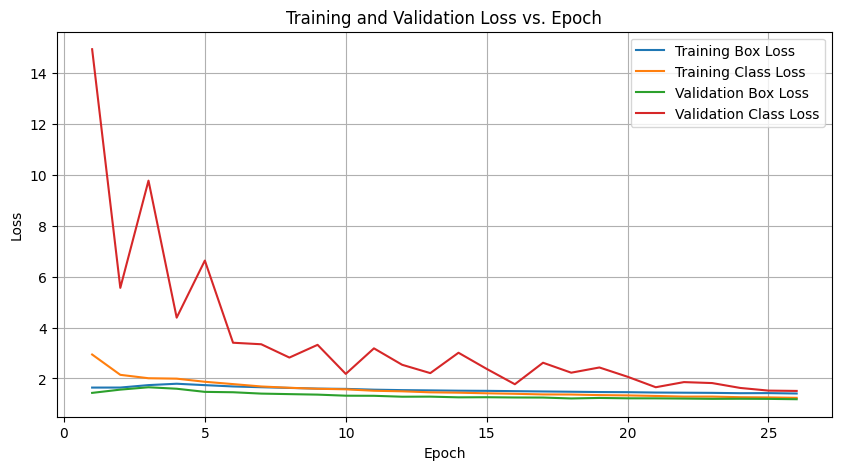

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Load your results file ---
file_path = '/content/runs/detect/train/results.csv'
try:
    data = pd.read_csv(file_path)

    # --- 2. Clean up column names (they have weird spacing) ---
    data.columns = data.columns.str.strip()

    # --- 3. Plot mAP vs. Epochs (Using the CORRECT column name) ---
    plt.figure(figsize=(10, 5))
    # This line is now fixed
    plt.plot(data['epoch'], data['metrics/mAP50(B)'], label='Validation mAP@0.5')
    plt.title('Model mAP (Accuracy) vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('mAP@0.5')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- 4. Plot Loss vs. Epochs ---
    plt.figure(figsize=(10, 5))
    plt.plot(data['epoch'], data['train/box_loss'], label='Training Box Loss')
    plt.plot(data['epoch'], data['train/cls_loss'], label='Training Class Loss')
    plt.plot(data['epoch'], data['val/box_loss'], label='Validation Box Loss')
    plt.plot(data['epoch'], data['val/cls_loss'], label='Validation Class Loss')
    plt.title('Training and Validation Loss vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find the file at {file_path}")
except KeyError as e:
    print(f"Error: A required column is missing from the CSV. {e}")
    print("Available columns are:")
    print(data.columns)